In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats


#importing of libraries relevant to manipulation(numpy nad pandas) and visualization of data(matplolib,seaborn,pyplot)

In [2]:
#loading of the data and previewing
data=pd.read_csv("/content/autolib_daily_events_postal_code.csv")
data


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [3]:
#no missing data in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [4]:
#splitting the dataset to weekdays and weekend datasets

weekdaydf=data[data['day_type']=='weekday']
weekdaydf.sort_values('date')


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
6705,92250,1/1/2018,1440,0,weekday,68,79,1,2,10,10,4,5
6549,92240,1/1/2018,1440,0,weekday,87,97,2,1,5,4,0,0
13278,94110,1/1/2018,1440,0,weekday,41,36,3,2,6,4,0,0
6393,92230,1/1/2018,1440,0,weekday,43,43,4,3,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,75006,6/8/2018,1438,4,weekday,283,280,4,4,11,11,47,46
9643,92600,6/8/2018,1438,4,weekday,174,156,8,8,17,13,0,0
7473,92300,6/8/2018,1438,4,weekday,179,175,3,3,21,23,0,0
6069,92200,6/8/2018,1438,4,weekday,70,80,0,0,2,2,0,0


In [5]:
#getting the weekend dataframe 

weekenddf=data[data['day_type']=='weekend']
weekenddf
weekenddf.sort_values('date')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
4690,92110,1/13/2018,1440,5,weekend,24,30,0,0,1,1,0,0
6561,92240,1/13/2018,1440,5,weekend,134,149,0,1,12,11,0,0
2976,75020,1/13/2018,1440,5,weekend,693,661,23,19,50,49,162,160
480,75004,1/13/2018,1440,5,weekend,328,326,5,5,33,34,45,47
6717,92250,1/13/2018,1440,5,weekend,102,91,6,5,4,4,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,92250,6/9/2018,1440,5,weekend,108,98,1,1,3,2,4,4
13579,94120,6/9/2018,1440,5,weekend,66,72,2,1,6,4,0,0
1081,75007,6/9/2018,1440,5,weekend,386,393,18,18,26,24,140,136
5602,92160,6/9/2018,1440,5,weekend,31,29,1,1,7,8,0,0


In [6]:
#comparing the mean, mode and median for the weekdays vs weekends, seems like most bluecars are taken over the weekend as compared to weekdays

print(weekdaydf['BlueCars_taken_sum'].describe())
print(weekenddf['BlueCars_taken_sum'].describe())


count    11544.000000
mean       116.028673
std        169.626905
min          0.000000
25%         18.000000
50%         42.000000
75%        126.000000
max       1093.000000
Name: BlueCars_taken_sum, dtype: float64
count    4541.000000
mean      151.090068
std       218.565642
min         0.000000
25%        25.000000
50%        59.000000
75%       156.000000
max      1352.000000
Name: BlueCars_taken_sum, dtype: float64


In [7]:
print(weekdaydf['BlueCars_returned_sum'].describe())
print(weekenddf['BlueCars_returned_sum'].describe())

count    11544.000000
mean       115.639380
std        168.344751
min          0.000000
25%         19.000000
50%         42.000000
75%        126.000000
max       1056.000000
Name: BlueCars_returned_sum, dtype: float64
count    4541.000000
mean      152.029289
std       221.140337
min         0.000000
25%        24.000000
50%        58.000000
75%       157.000000
max      1332.000000
Name: BlueCars_returned_sum, dtype: float64


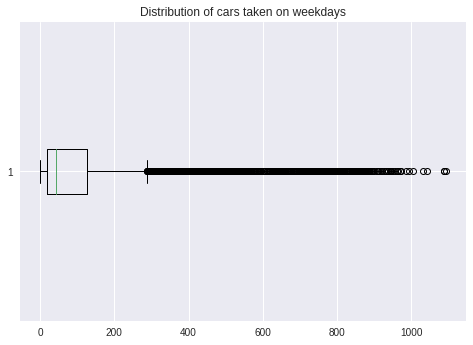

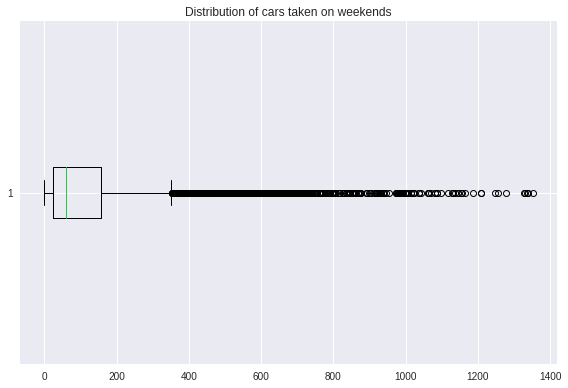

In [8]:
#using matplolib to identify outliers. In both datasets there are a lot datapoints that are outliers
plt.style.use('seaborn')
fig1, ax1=plt.subplots()
fig2, ax2=plt.subplots()
ax1.boxplot(x=weekdaydf['BlueCars_taken_sum'], vert=False)
ax1.set_title('Distribution of cars taken on weekdays')
plt.tight_layout()
ax2.boxplot(x=weekenddf['BlueCars_taken_sum'],vert=False)
ax2.set_title('Distribution of cars taken on weekends')
plt.tight_layout()

In [9]:
#grouped the data by location to be able to get a clearer picture. In this case we are looking at a snippet of location 75001

grouped_data=weekdaydf.groupby('Postal code')
grouped_data.get_group(75001).head(5)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [10]:
#comparing the two locations by descriptive statistics

print(grouped_data.get_group(75001)['BlueCars_taken_sum'].describe())
print(grouped_data.get_group(92190)['BlueCars_taken_sum'].describe())

count    112.000000
mean     117.241071
std       20.406343
min        6.000000
25%      103.000000
50%      118.000000
75%      130.000000
max      157.000000
Name: BlueCars_taken_sum, dtype: float64
count    112.000000
mean      57.446429
std       11.190278
min        4.000000
25%       51.000000
50%       57.000000
75%       64.000000
max       84.000000
Name: BlueCars_taken_sum, dtype: float64


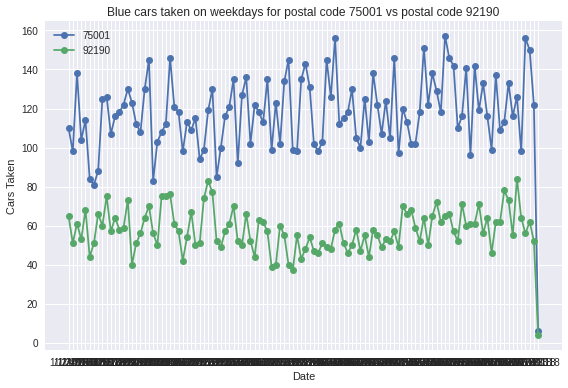

In [11]:

plt.plot_date(x=grouped_data.get_group(75001)['date'], y=grouped_data.get_group(75001)['BlueCars_taken_sum'], linestyle='solid', label='75001')
plt.title('Blue cars taken on weekdays for postal code 75001 vs postal code 92190')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cars Taken')
plt.tight_layout()

plt.plot_date(x=grouped_data.get_group(92190)['date'], y=grouped_data.get_group(92190)['BlueCars_taken_sum'], linestyle='solid', label='92190')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cars Taken')
plt.tight_layout()

In [12]:
#Taking the weekend data for location 75001 over the same period
wgrouped_data=weekenddf.groupby('Postal code')
wgrouped_data.get_group(75001).head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,2,2,25,25,41,39


In [13]:
# Getting descriptive statistics to get a clearer pictureof the selected data.
print(wgrouped_data.get_group(75001)['BlueCars_taken_sum'].describe())
print(wgrouped_data.get_group(92190)['BlueCars_taken_sum'].describe())

count     44.000000
mean     178.727273
std       39.030914
min        8.000000
25%      159.750000
50%      185.500000
75%      199.750000
max      254.000000
Name: BlueCars_taken_sum, dtype: float64
count     44.000000
mean      84.909091
std       17.341734
min        5.000000
25%       81.250000
50%       86.000000
75%       92.000000
max      119.000000
Name: BlueCars_taken_sum, dtype: float64


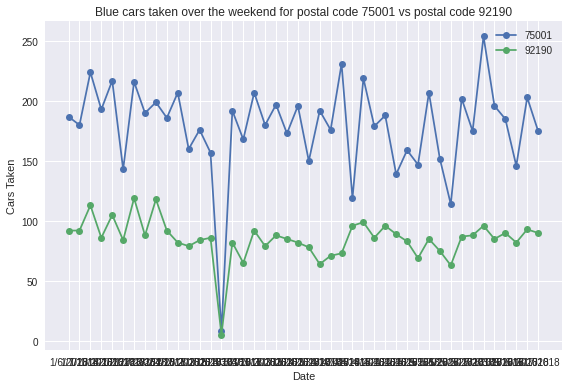

In [14]:
#Plotting a graph comparing the blue cars taken over the weekend over the time period

plt.plot_date(x=wgrouped_data.get_group(75001)['date'], y=wgrouped_data.get_group(75001)['BlueCars_taken_sum'], linestyle='solid',label='75001')
plt.title('Blue cars taken over the weekend for postal code 75001 vs postal code 92190')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cars Taken')
plt.tight_layout()

plt.plot_date(x=wgrouped_data.get_group(92190)['date'], y=wgrouped_data.get_group(92190)['BlueCars_taken_sum'], linestyle='solid',label='92190')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cars Taken')
plt.tight_layout()


In [15]:
#Finding out which is the busiest weekday over the period
groupbyday=weekdaydf.groupby('dayOfWeek')
groupbyday.get_group(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
10,75001,1/11/2018,1440,3,weekday,125,125,3,4,13,13,22,22
17,75001,1/18/2018,1439,3,weekday,122,122,7,7,8,8,21,21
24,75001,1/25/2018,1398,3,weekday,130,130,0,0,4,4,20,20
31,75001,2/1/2018,1440,3,weekday,112,110,4,4,15,15,21,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16048,95880,5/3/2018,1439,3,weekday,10,10,0,0,2,1,0,0
16058,95880,5/24/2018,1436,3,weekday,11,17,1,1,2,1,0,0
16065,95880,5/31/2018,1411,3,weekday,12,17,0,0,0,0,0,0
16072,95880,6/7/2018,1439,3,weekday,10,11,1,0,0,0,0,0


Text(0, 0.5, 'blue cars taken')

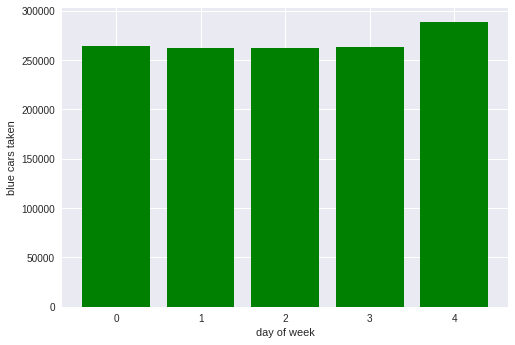

In [16]:
#Finding out the busiest day of the week by suming up the total number of blue cars taken on each day over the period.
#In percentage friday(4) is the busiest weekday though not by much
total=groupbyday['BlueCars_taken_sum'].sum()
total
days=groupbyday['dayOfWeek'].unique()
days
plt.bar(days,total, color='green')
plt.legend()
plt.xlabel('day of week')
plt.ylabel('blue cars taken')

In [17]:
#Finding out the busiest day of the weekend by suming up and getting the total number of blue cars taken on each day over the period.
# In this case this is sarturday and sunday are equally busy days with almost a similar amount of cars taken.
wgroupbyday=weekenddf.groupby('dayOfWeek')
wgroupbyday['BlueCars_taken_sum'].sum()
weekendpercentange=wgroupbyday['BlueCars_taken_sum'].sum()/weekenddf['BlueCars_taken_sum'].sum()*100
weekendpercentange

dayOfWeek
5    51.586358
6    48.413642
Name: BlueCars_taken_sum, dtype: float64

# **HYPOTHESIS TESTING**
The dataset we are working with is from the autolib network,a public electric car-sharing program/service.

We are investigating a claim that the average number of blue cars taken on Friday is greater than the average during the for the first four days of the week denoted as below

H0:

This could be the first step in determining the optimum number of cars made available as we approach the end of the week, servicing patterns for the cars etc.

We are working with a confidence level of 95%.This is a measure of certainty regarding how accurately a sample reflects the population.


In [18]:
#grouping the data by date to check normality
groupbydate=weekdaydf.groupby('date')
groupbydate.get_group('1/17/2018')['BlueCars_taken_sum'].sum()


12191

In [20]:

weekdaydf['BlueCars_taken_sum'].describe()

count    11544.000000
mean       116.028673
std        169.626905
min          0.000000
25%         18.000000
50%         42.000000
75%        126.000000
max       1093.000000
Name: BlueCars_taken_sum, dtype: float64

In [21]:
groupbyday['BlueCars_taken_sum'].mean()

dayOfWeek
0    111.159646
1    110.850614
2    115.453704
3    116.052469
4    127.056803
Name: BlueCars_taken_sum, dtype: float64

In [54]:
#for purposes of sampling. I have picked stratified sampling as the data is already stratified locationwise, therefore picking a random sample from each strata proportionately
#I had previously grouped the data by Day of week as grouped_data for the weekdays.Getting the average for the the first four days.

groupbyday['BlueCars_taken_sum'].sum()
fourdaysum=groupbyday.get_group(0)['BlueCars_taken_sum'].mean() + groupbyday.get_group(1)['BlueCars_taken_sum'].mean() +groupbyday.get_group(2)['BlueCars_taken_sum'].mean()+groupbyday.get_group(3)['BlueCars_taken_sum'].mean()
fourdayaverage=fourdaysum/4
fourdayaverage

113.37910815826473

In [40]:
mon=groupbyday.get_group(3)['BlueCars_taken_sum']
print(mon.shape)

(2268,)


In [31]:
#performing the test
_,p_value=stats.ttest_ind(a=fourdaysum,b=fridaydata['BlueCars_taken_sum'],equal_var=False)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
